In [28]:
 #IMPORTING LIBRARIES

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns


# Gathering Data

Let's start by loading data

In [29]:
df_calendar=pd.read_csv('C:/Users/Thinkpad/Desktop/airbnb/calendar.csv')
df_listing=pd.read_csv('C:/Users/Thinkpad/Desktop/airbnb/listings.csv')

In [30]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Price data type needs to be changed from string to float and also remove $ from it.

In [31]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [32]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [33]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Cleaning Data

There are some missing values in almost 10 columns that i might be concerned of during the analysis so my plan to deal with each of them is as following:

1) I will drop  the square_feet and license columns, because the license column is a blank column, and the square foot barely has data (97 records out of 3818)

2) I will fill in the following columns: reviews_per_month, beds, bedrooms, bathrooms with Mean because the missing values are not too much

3) I will fill in these columns: space, property_type, host_name, host_is_superhost, with Mode because they are categorical variables and there are not too many missing values

In [34]:
#dropping the columns 
df_listing.drop(columns=['square_feet','license'],inplace=True)

#dealing with numerical missing values columns 

df_listing['beds'].fillna(df_listing['beds'].mean(),inplace=True)
df_listing['bedrooms'].fillna(df_listing['bedrooms'].mean(),inplace=True)
df_listing['bathrooms'].fillna(df_listing['bathrooms'].mean(),inplace=True)

#dealing with categorical missing values columns 

df_listing['space'].fillna(df_listing['space'].mode()[0],inplace=True)
df_listing['property_type'].fillna(df_listing['property_type'].mode()[0],inplace=True)
df_listing['host_name'].fillna(df_listing['host_name'].mode()[0],inplace=True)
df_listing['host_is_superhost'].fillna(df_listing['host_is_superhost'].mode()[0],inplace=True)

In [35]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3818 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Handling price issue that was in Calendar df , i need to convert it float and remove $ or , characters from it

In [36]:
def new_price(df):
    '''
    summary : this function cleans the price by objects and convert it to float 
              
    Input: Dataframe that it's needed to clean the price in it
    
    Output : df with Cleaned price  $ ,"," are removed
    
     '''
    df['price']=df['price'].map(lambda p: float(p[1:].replace(",","")) if type(p) != float else p)
    return df

In [37]:
new_price(df_calendar)
df_calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [38]:
new_price(df_listing)
df_listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,"*Note: This fall, there will be major renovati...",A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,10.0,8.0,f,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,10.0,f,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...","*Note: This fall, there will be major renovati...","Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,NaN,f,WASHINGTON,f,moderate,f,f,1,NaN


I want to know the maximum monthly price, so i separate the date by month and year

In [39]:
df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['Month_Year'] = pd.to_datetime(df_calendar['date']).dt.to_period('M')

df_calendar

,listing_id,date,available,price,month,year,Month_Year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,NaN,1,2016,2016-01
3,241032,2016-01-07,f,NaN,1,2016,2016-01
4,241032,2016-01-08,f,NaN,1,2016,2016-01
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,12,2016,2016-12
1393566,10208623,2016-12-30,f,NaN,12,2016,2016-12
1393567,10208623,2016-12-31,f,NaN,12,2016,2016-12
1393568,10208623,2017-01-01,f,NaN,1,2017,2017-01


# 1.What is the average price monthly?

,Month_Year,avg_price
0,2016-01,121.568409
1,2016-02,124.293927
2,2016-03,128.644488
3,2016-04,135.097005
10,2016-11,135.688738
12,2017-01,136.882590
9,2016-10,137.031939
11,2016-12,137.251835
4,2016-05,139.538183
8,2016-09,143.255949


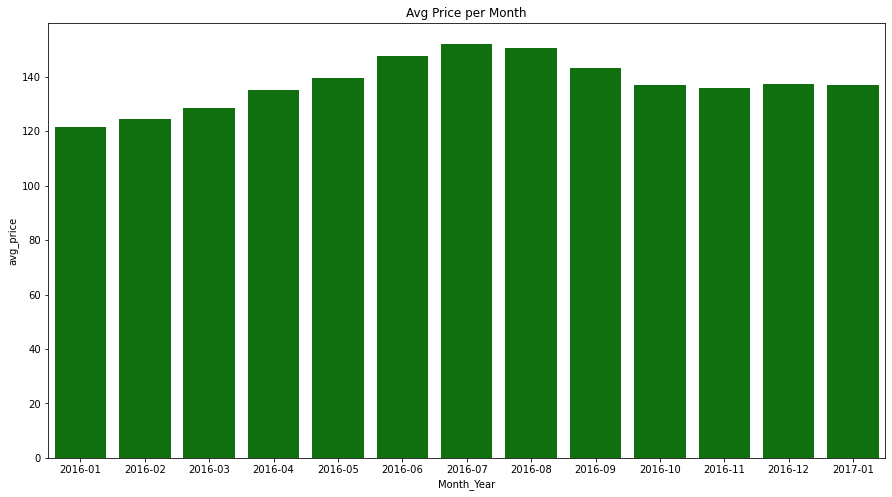

In [40]:
price=df_calendar.groupby('Month_Year')['price'].mean().reset_index().rename(columns={'price':'avg_price'})

x=price['Month_Year']
y=price['avg_price']

#price.plot()
plt.figure(figsize=(15,8))
plt.title("Avg Price per Month")

sns.barplot(data=price,x='Month_Year',y='avg_price',color='g',palette=None)
price.sort_values(by='avg_price',ascending=True)

As you can see in the above, the prices was more expensive compare with other months in that year especially in June, July and August. This makes perfect sense, summer time!

(0.0, 400.0)

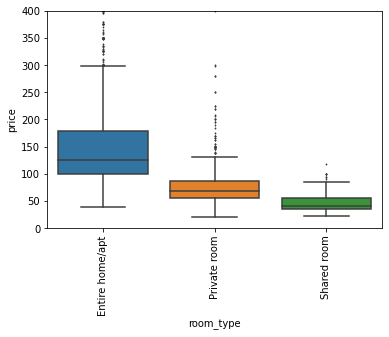

In [41]:
ax = sns.boxplot(data=df_listing, x='room_type',y='price',fliersize=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

As expected, private and shared room type have negative correlation with price.

# 2.Check the avg_price according to the neighbors and rooms

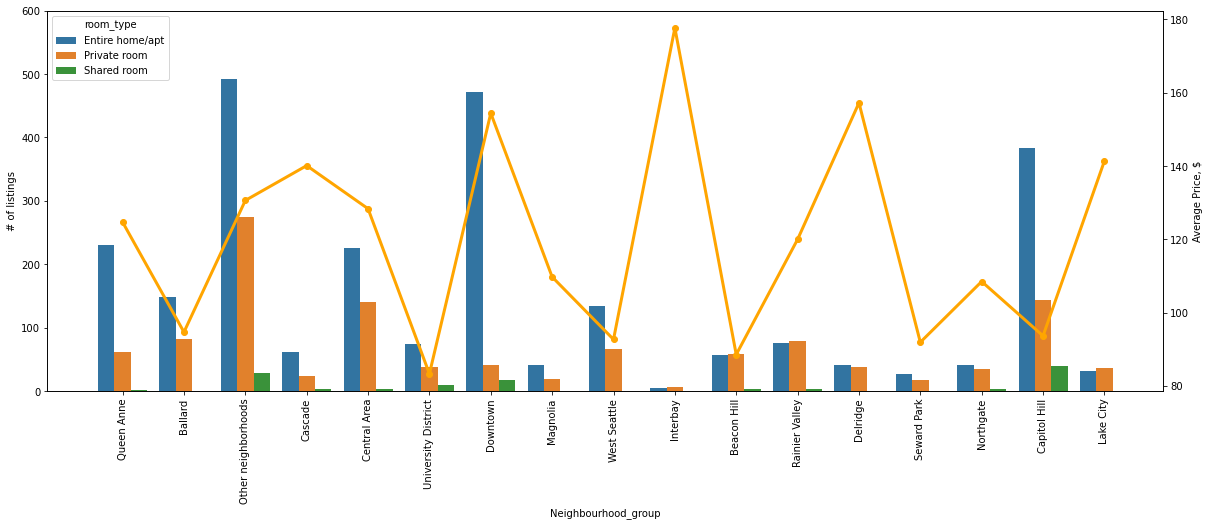

In [42]:
plt.figure(figsize=(20,7))
ax = sns.countplot(data=df_listing, x='neighbourhood_group_cleansed',hue='room_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Neighbourhood_group')
ax.set_ylabel('# of listings')

ax2 = ax.twinx()
ax2.plot(df_listing.groupby(['neighbourhood_group_cleansed'])['price'].mean(), color='orange', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('Average Price, $')

ax.set_ylim(0, 600)
plt.show()

(0.0, 400.0)

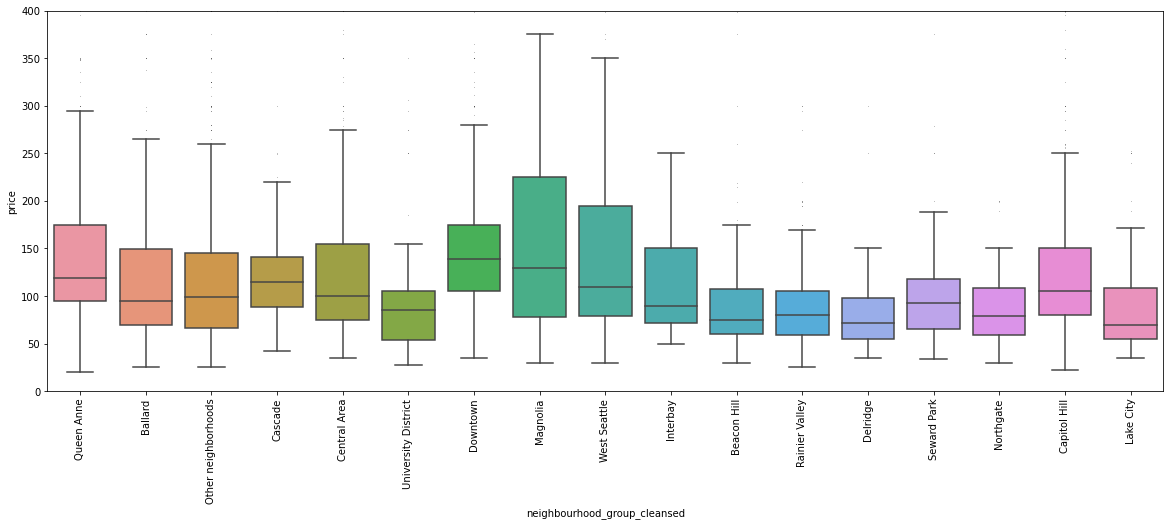

In [43]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(data=df_listing, x='neighbourhood_group_cleansed',y='price',fliersize=0.1,)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

As is seen, Downtown and Capitol hill have much higher average listing prices than University District, indicating the University District has high demand from budget travelers (could be students).

# 3.What is the busiest month in terms of availability of listings ?

,Month_Year,avg_availability
12,2017-01,0.746202
11,2016-12,0.735573
10,2016-11,0.713986
2,2016-03,0.709187
9,2016-10,0.696514
4,2016-05,0.675670
8,2016-09,0.674402
5,2016-06,0.674384
3,2016-04,0.663847
1,2016-02,0.662208


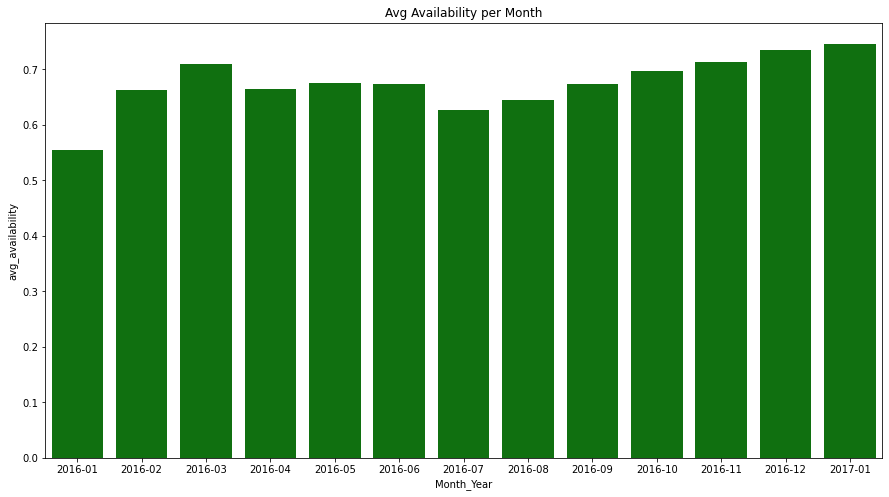

In [49]:
df_calendar['available'].replace({'t':1,'f':0},inplace=True) # Objects convert to float
availibility=df_calendar.groupby('Month_Year')['available'].mean().reset_index().rename(columns={'available':'avg_availability'})

x=availibility['Month_Year']
y=availibility['avg_availability']

#availibility.plot()
plt.figure(figsize=(15,8))
plt.title("Avg Availability per Month")

sns.barplot(data=availibility,x='Month_Year',y='avg_availability',color='g',palette=None)
availibility.sort_values(by='avg_availability',ascending=False)



The prices was more expensive compare with other months in that year especially in November, December and January. This makes perfect sense, since Seattle in general is very popular during the Christmas months.

# 4.Where are the most/less neighbors expensive listings?

,neighbourhood,avg_price
0,Fairmount Park,370.000000
1,Industrial District,245.000000
2,Portage Bay,241.428571
3,Westlake,197.000000
4,Alki,196.652174


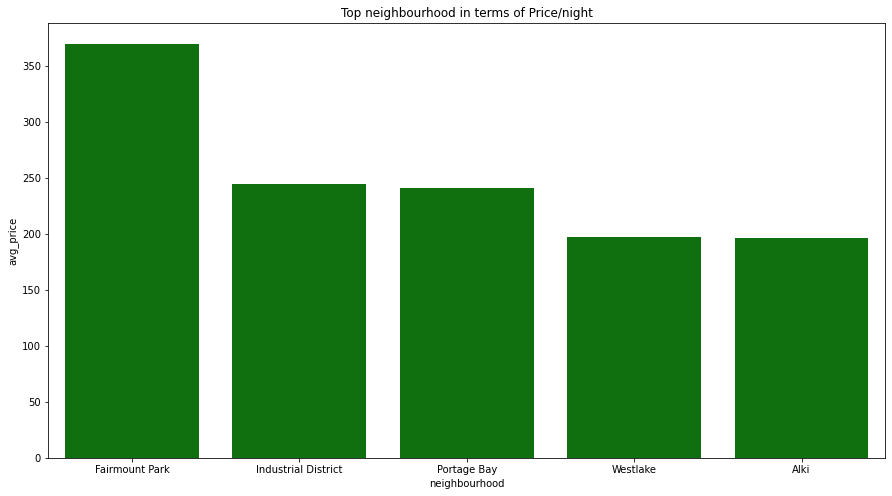

In [50]:
#The most expensive
Top_neighbour_per_price=df_listing.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'avg_price'})

x=Top_neighbour_per_price['neighbourhood'].head(5)
y=Top_neighbour_per_price['avg_price'].head(5)

plt.figure(figsize=(15,8))
plt.title("Top neighbourhood in terms of Price/night")
sns.barplot(data=Top_neighbour_per_price,x=x,y=y,color='g',palette=None)
Top_neighbour_per_price.head(5)

,neighbourhood,avg_price
0,Roxhill,60.000000
1,Olympic Hills,63.666667
2,Dunlap,75.461538
3,Rainier Beach,76.722222
4,Georgetown,77.000000


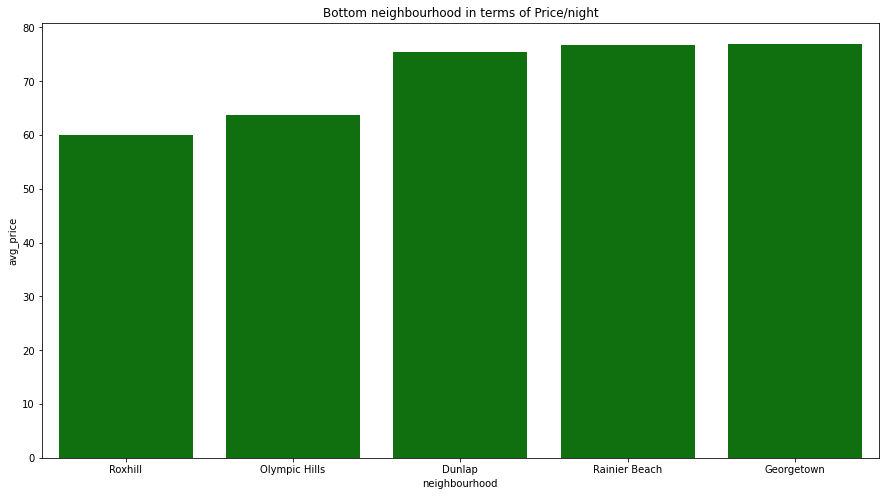

In [51]:
#The cheapiest 
bottom_neighbour_per_price=df_listing.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).reset_index().rename(columns={'price':'avg_price'})

x=bottom_neighbour_per_price['neighbourhood'].head(5)
y=bottom_neighbour_per_price['avg_price'].head(5)

plt.figure(figsize=(15,8))
plt.title("Bottom neighbourhood in terms of Price/night")
sns.barplot(data=bottom_neighbour_per_price,x=x,y=y,color='g',palette=None)
bottom_neighbour_per_price.head(5)

# 5.Who are the top 5 host names and what are the types of listings they offer ?

In [52]:
df_listing.room_type.value_counts()


host_stats_total=df_listing.groupby('host_name')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id': 'total'})
host_stats_entire=df_listing[df_listing['room_type']=='Entire home/apt'].groupby('host_name')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id':'entire'})
host_stats_private=df_listing[df_listing['room_type']=='Private room'].groupby('host_name')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id': 'private'})
host_stats_shared=df_listing[df_listing['room_type']=='Shared room'].groupby('host_name')['id'].count().sort_values(ascending=False).reset_index().rename(columns={'id': 'shared'})

dfs=[host_stats_total, host_stats_entire,host_stats_shared,host_stats_private]
dfs=[df.set_index('host_name') for df in dfs]

top_5_hosts=dfs[0].join(dfs[1:]).fillna(0).head(5) 
top_5_hosts.rename(columns={'total':'Total_listings','entire': 'Entire Room','shared':'Shared Room','private':'Private Room'},inplace=True)
top_5_hosts

,Total_listings,Entire Room,Shared Room,Private Room
host_name,,,,
Andrew,58,12.0,36.0,10.0
Jordan,48,46.0,0.0,2.0
Daniela,47,47.0,0.0,0.0
Michael,46,17.0,14.0,15.0
Melissa,45,35.0,0.0,10.0


Andrew has 58 listings ready for booking and he has various type of properties.

# Conclusion

The business is at the peak in March,November,December and January. However, the most expensive time to book is in June,July and August which accordingly accompanied by low available listings, this is to keep profit constant as much as hosts can. 
Downtown and Capitol hill have much higher average listing prices than University District, indicating the University District has high demand from budget travelers (could be students).
Last thing, if you want to get enjoy luxurious visit, go to fairmount park neighbourhood. There are a lot of amenties, totally worth it!If you are not interested, go to roxhill or olympic hills but with less amenties properties.